In [147]:
from pytorch_lightning.core.module import LightningModule


In [146]:
import torch
import numpy as np

print('===========')
print('mal VS matmul')
print('============')
m1=torch.FloatTensor([[1,2],[3,4]])
m2=torch.FloatTensor([[1],[2]])
print(m1.shape)
print(m2.shape)
print(m1.matmul(m2))

mal VS matmul
torch.Size([2, 2])
torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


1) torch 메인 네임스페이스입니다. 텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가집니다. torch 패키지는 다차원 텐서에 대한 데이터 구조를 포함하고 이러한 텐서에 대한 수학적 연산을 정의합니다. 또한 Tensor 및 임의 유형의 효율적인 직렬화 및 기타 유용한 유틸리티를 위한 많은 유틸리티를 제공합니다.

2) torch.autograd torch.autograd임의의 스칼라 값 함수의 자동 미분을 구현하는 클래스 및 함수를 제공합니다. 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있습니다. 현재로서는 부동 소수점 Tensor유형(half, float, double 및 bfloat16) 및 복합 Tensor유형(cfloat, cdouble)에 대해서만 autograd를 지원합니다.

backward : 그래프 잎에 대해 주어진 텐서의 기울기의 합을 계산합니다.
grad : 입력에 대한 출력 기울기의 합을 계산하고 반환합니다.
3) torch.nn, torch.nn.functional 파이토치에서 신경망을 쌓기 위한 코어 모듈은 torch.nn입니다. 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있습니다. 완전연결층(fully connected layer, nn.Linear), 합성곱층(convolutional layer, nn.Conv2d), RNN, LSTM과 같은 Layer들, ReLU와 같은 활성화 함수(activation function), MSELoss와 같은 손실 함수(loss function)들이 있습니다. 자세한 설명은 https://pytorch.org/docs/stable/nn.html 을 참고 하세요.

4) torch.optim torch.optim다양한 최적화 알고리즘을 구현한 패키지입니다. 확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어져 있습니다.

5) torch.utils.data PyTorch 데이터 로딩 유틸리티의 핵심은 Dataset, DataLoader 클래스입니다. Dataset을 통해 개인적인(custom) 데이터를 pytorch 표준 텐서로 바꿀 수 있습니다. 그리고 DataLoader를 통해 배치단위로 학습 루프에 들어가기 위한 데이터를 준비해주는 데이터 로더를 만들 수 있습니다.



In [9]:
import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F

x_train=torch.zeros(20,requires_grad=True)
y_train=torch.zeros(20,requires_grad=True)

print(x_train)
print(y_train)

w=torch.zeros(20,requires_grad=True)
b=torch.zeros(20,requires_grad=True)
hypoth=x_train*w+b

print(hypoth)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<AddBackward0>)


# 손실함수는 평균제곱오차, 옵티마이저는 SGD(Stochastic Gradient Descent)를 사용합니다.
손실 함수는 실제값과 예측값의 차이(loss, cost)를 수치화해주는 함수입니다. 오차가 클수록 손실 함수의 값이 크고, 오차가 작을수록 손실 함수의 값이 작아집니다. 선형회귀란 손실 함수의 값을 최소화 하는 W, b를 찾아가는것이 학습 목표이다. **일반적으로 회귀문제에서는 평균제곱오차, 분류 문제에서는 크로스 엔트로피를 사용합니다.**

손실함수를 줄여나가면서 학습하는 방법은 어떤 optimizer를 사용하느냐에 따라 달라집니다. 옵티마이저는 학습 데이터(Train data)셋을 이용하여 모델을 학습 할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 잘 줄일 수 있게 만들어주는 역할을 하는 것입니다. 딥러닝에서 모델을 학습시킨다는건 최적화(optimization) 태스크를 수행하는 것과 같습니다. **여기서 최적화란, 손실 함수(loss funciton)의 최솟값을 찾아나가는 일련의 과정을 말합니다. 최적화는 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정하는 과정입니다. 최적화 알고리즘은 이 과정이 수행되는 방식(여기에서는 확률적 경사하강법(SGD; Stochastic Gradient Descent))을 정의합니다.** 한 스텝마다 이동하는 크기, 즉 보폭이 학습률(learning rate)로 정의되고, 앞으로 이동할 방향은 현 지점의 기울기(gradient)를 통해 정의됩니다.

’SGD’는 경사 하강법의 일종입니다. lr은 학습률(learning rate)를 의미합니다. Stochastic Gradient Desenct(SGD)는 Loss Function을 계산할 때, 전체 데이터(Batch) 대신 일부 데이터의 모음(Mini-Batch)를 사용하여 Loss Function을 계산하여 속도가 빠르게 동작하는 옵티마이저 입니다.

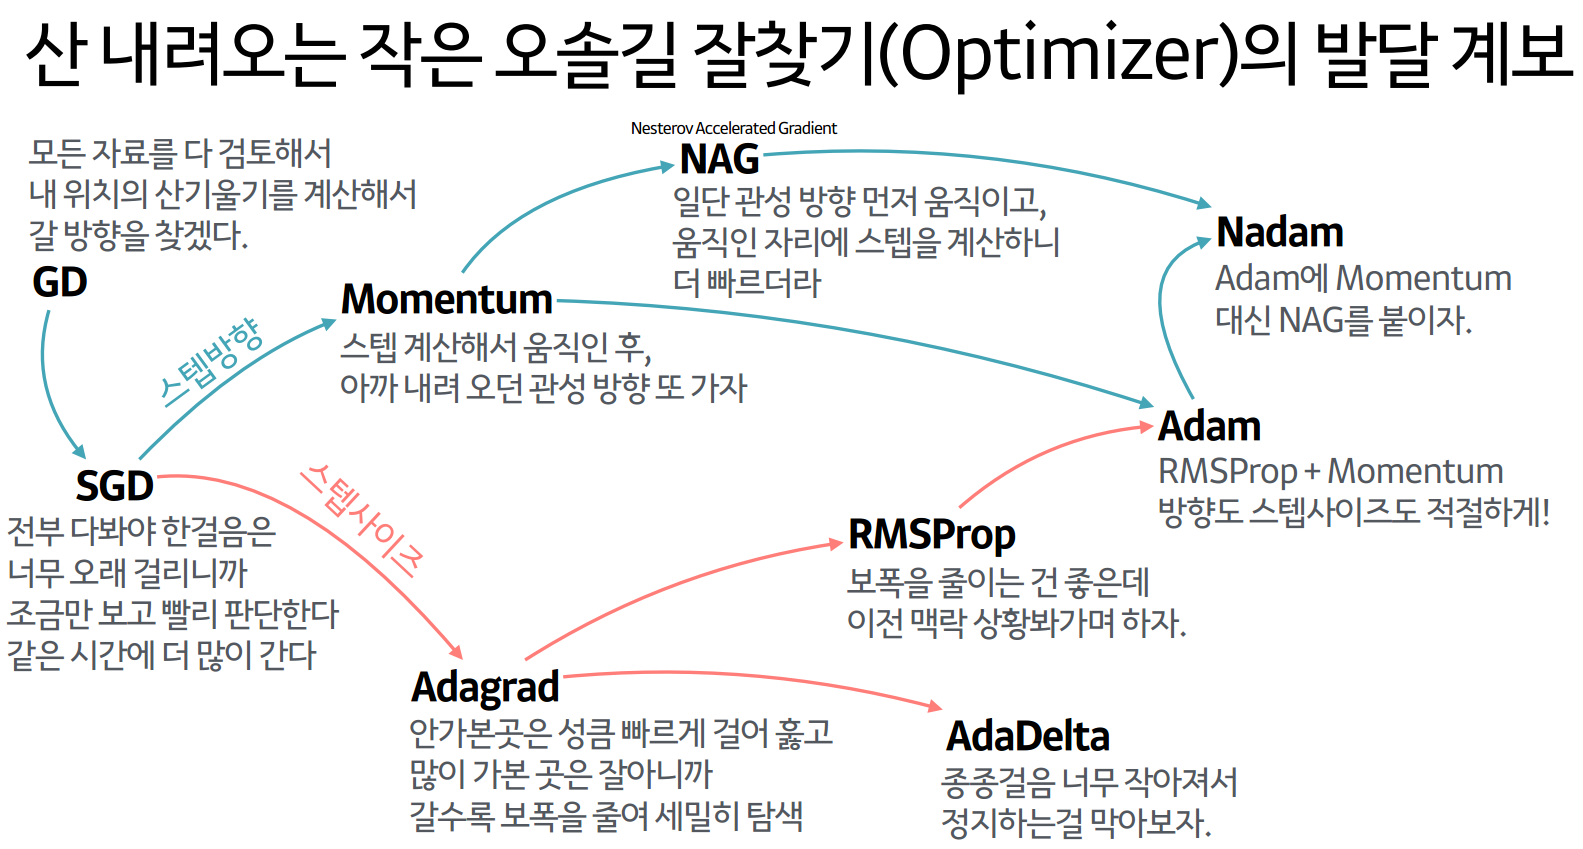

최적화 단계의 각 반복(iteration)을 에폭이라고 부릅니다. 하나의 에폭은 다음 두 부분으로 구성됩니다.

학습 단계(train loop) - 학습용 데이터셋을 반복(iterate)하고 최적의 매개변수로 수렴합니다.
검증/테스트 단계(validation/test loop) - 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터셋을 반복(iterate)합니다.
epoch 를 100으로 반복 학습 합니다. 모델의 예측값과 그에 해당하는 정답(label)을 사용하여 오차(error, 손실(loss, cost) )를 계산합니다. Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야합니다. optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 0으로 설정합니다. 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다. 한번의 학습이 완료되어지면(즉, Iteration이 한번 끝나면) gradients를 항상 0으로 만들어 주어야 합니다. 만약 gradients를 0으로 초기화해주지 않으면 gradient가 의도한 방향이랑 다른 방향을 가르켜 학습이 원하는 방향으로 이루어 지지 않습니다.

다음 단계는 신경망을 통해 이 예측 손실(prediction loss)을 역전파합니다. 오차 텐서(error tensor)에 .backward() 를 호출하면 역전파가 시작됩니다. 역전파 계산은 .backward()를 호출하여, 자동으로 모든 기울기(gradient)를 계산할 수 있습니다. PyTorch는 각 매개변수에 대한 손실의 변화도를 자동 저장합니다.

마지막으로 .step 을 호출하여 경사하강법(gradient descent)을 시작합니다. 옵티마이저는 .grad 에 저장된 변화도에 따라 각 매개변수를 조정합니다. tensor에 대한 기울기(gradient)는 .grad 속성에 누적될 것입니다.

In [55]:
import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F

x_train=torch.zeros(1,requires_grad=True)
y_train=torch.zeros(1,requires_grad=True)

print(x_train)
print(y_train)

w=torch.zeros(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)
hypoth=x_train*w+b

print(hypoth)



import torch.optim as opt

#loss_f=nn.CrossEntropyLoss()
#loss=torch.mean((hypoth-y_train)**2)

#opt=opt.SGD([w,b],lr=0.001)  #경사하강
#opt=opt.Adam([w,b],lr=0.001)#아담
cost = torch.mean((hypothesis - y_train) ** 2)
optimizer = optim.SGD([W, b], lr=0.01)

epochs=20000
for epoch in range(epochs):
    hopoth=x_train*w+b
    #loss=torch.mean((hypoth-y_train)**2)
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100==0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, epochs, W.item(), b.item(), loss.item()))

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)
tensor([0.], grad_fn=<AddBackward0>)


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# 재사용을 위해 랜덤값을 초기화 합니다.
torch.manual_seed(1)


x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[3], [6], [9]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b
cost = torch.mean((hypothesis - y_train) ** 2)
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 200000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))




Epoch    0/200000 W: 0.280, b: 0.120 Cost: 42.000000
Epoch  100/200000 W: 2.619, b: 0.867 Cost: 0.108384
Epoch  200/200000 W: 2.700, b: 0.682 Cost: 0.066975
Epoch  300/200000 W: 2.764, b: 0.536 Cost: 0.041386
Epoch  400/200000 W: 2.815, b: 0.421 Cost: 0.025574
Epoch  500/200000 W: 2.854, b: 0.331 Cost: 0.015803
Epoch  600/200000 W: 2.886, b: 0.260 Cost: 0.009765
Epoch  700/200000 W: 2.910, b: 0.205 Cost: 0.006034
Epoch  800/200000 W: 2.929, b: 0.161 Cost: 0.003729
Epoch  900/200000 W: 2.944, b: 0.126 Cost: 0.002304
Epoch 1000/200000 W: 2.956, b: 0.099 Cost: 0.001424
Epoch 1100/200000 W: 2.966, b: 0.078 Cost: 0.000880
Epoch 1200/200000 W: 2.973, b: 0.061 Cost: 0.000544
Epoch 1300/200000 W: 2.979, b: 0.048 Cost: 0.000336
Epoch 1400/200000 W: 2.983, b: 0.038 Cost: 0.000208
Epoch 1500/200000 W: 2.987, b: 0.030 Cost: 0.000128
Epoch 1600/200000 W: 2.990, b: 0.023 Cost: 0.000079
Epoch 1700/200000 W: 2.992, b: 0.018 Cost: 0.000049
Epoch 1800/200000 W: 2.994, b: 0.014 Cost: 0.000030
Epoch 1900/

In [60]:
import torch

w=torch.tensor(3.0,requires_grad=True)
y=w**3+2*w**2+7
y.backward()
for i in range(10):
    print(f'{w.grad}')

import torch

x=torch.ones(5)
y=torch.ones(3)
w=torch.rand(5,3,requires_grad=True)
b=torch.rand(3,requires_grad=True)
z=torch.matmul(x,w)+b
loss=torch.nn.functional.binary_cross_entropy_with_logits(z,y)

loss.backward()
print(w.grad)
print(b.grad)

39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
tensor([[-0.0102, -0.0111, -0.0308],
        [-0.0102, -0.0111, -0.0308],
        [-0.0102, -0.0111, -0.0308],
        [-0.0102, -0.0111, -0.0308],
        [-0.0102, -0.0111, -0.0308]])
tensor([-0.0102, -0.0111, -0.0308])


In [69]:
x=torch.ones(5)
y=torch.zeros(3)
w=torch.randn(5,3,requires_grad=True)
b=torch.randn(3,requires_grad=True)
z=torch.matmul(x,w)+b
loss_f=nn.MSELoss()
loss=loss_f(z,y)
loss.backward()

print(w.grad)
print(b.grad)


z=torch.matmul(x,w)+b
print(z)

with torch.no_grad():
    z=torch.matmul(x,w)+b

print(z.requires_grad)

z=torch.matmul(x,w)+b
z_det=z.detach()

print(z.requires_grad)

tensor([[-1.7169, -2.9636,  0.6776],
        [-1.7169, -2.9636,  0.6776],
        [-1.7169, -2.9636,  0.6776],
        [-1.7169, -2.9636,  0.6776],
        [-1.7169, -2.9636,  0.6776]])
tensor([-1.7169, -2.9636,  0.6776])
tensor([-2.5753, -4.4454,  1.0163], grad_fn=<AddBackward0>)
False
True


import torch.nn as nn
import torch.nn.functional as F

class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.conv1=ConV2d(1,20,5)
        self.conv2=ConV2d(20,20,5)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        return f.relu(self.conv2(x))

#nn.Flatten nn.Flatten 계층을 초기화하여 각 28x28의 2D 이미지를 
784 픽셀 값을 갖는 연속된 배열로 변환합니다. (dim=0의 미니배치 차원은 유지됩니다.)
flatten=nn.Flatten()
flat_image=flatten(input_image)
print(flat_image.size())

#nn.Linear 선형 계층 은 저장된 가중치(weight)와 편향(bias)을 
#사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈입니다.

layer1=nn.Linear(in_flatten=28*28,out_flatten=20)
hidden1=layer1(flat_image)
print(hidden1.size())

'''nn.ReLU 비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 
비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 
신경망이 다양한 현상을 학습할 수 있도록 돕습니다. 
이 모델에서는 nn.ReLU 를 선형 계층들 사이에 사용하지만,
모델을 만들 때는 비선형성을 가진 다른 활성화를 도입할 수도 있습니다.'''

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

#nn.Sequential nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 
#데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 
#순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.

seq_model=nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image=torch.rand(2,28,28)
logits=seq_model(input_image)

'''
nn.Softmax 신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달될
([-infty, infty] 범위의 원시 값(raw value)인) logits 를 반환합니다. 
logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 
범위로 비례하여 조정(scale)됩니다. dim 매개변수는 값의 합이 1이 되는 차원을 나타냅니다.
softmax = nn.Softmax(dim=1) pred_probab = softmax(logits)

-------------------------------------------------------------------------
신경망의 일반적인 학습과정은 다음과 같다.

학습 가능한 매개 변수(또는 가중치(weight)를 갖는 신경망을 정의한다.
데이터셋(dataset)입력을 반복한다.
입력을 신경망에서 전파(process)한다.
손실(loss: 출력이 정답으로부터 얼마나 떨어져 있는지)을 계산한다.
변화도(gradient)를 신경망의 매개변수들에 역으로 전파한다. (Backpropagation)
신경망의 가중치를 갱신한다. 일반적으로 다음과 같은 간단한 규칙을 사용한다.
업데이트된 가중치(weight) = 가중치(weight) - 학습률(learning rate) * 변화도(gradient)
'''

In [129]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

device='cuda'if torch.cuda.is_available() else 'cpu'
print(f'{device} mode')
class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.flatten=nn.Flatten()
        self.stack=nn.Sequential(
            nn.Linear(28*28,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32,10))
    def forward(self,x):
         x=self.flatten(x)
         logits=self.stack(x)
         return logits



#=========================================================

train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor())

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor())

train_loader=DataLoader(train_data,batch_size=64)
test_loader=DataLoader(test_data,batch_size=64)
print(train_loader)
print(test_loader)
#===================================================
model=net().to(device)
print(model)
lr=0.001
batch=64
epochs=100


loss_f=nn.CrossEntropyLoss()
opt=torch.optim.Adam(model.parameters(),lr=lr)

def train_loop(loader,model,loss_f,opt):
    size=len(loader.dataset)

    for batch,(x,y)in enumerate(loader):
        x = x.to(device)  # GPU 사용 시 추가
        y = y.to(device) 
        pred = model(x)
        loss = loss_f(pred, y)

        
        opt.zero_grad()
        loss.backward()
        opt.step()
        if batch %100==0:
            loss,current=loss.item(),batch*len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(loader,model,loss_f):
    size=len(loader.dataset)
    num_batch=len(loader)
    test_loss,correct=0,0
    with torch.no_grad():
        for x,y in loader:
            x=x.to(device)
            y=y.to(device)
            pred=model(x)
            test_loss += loss_f(pred,y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=num_batch
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_f, opt)
    train_loop(train_loader, model, loss_f, opt)
    test_loop(test_loader, model, loss_f)
print("Done!")

cuda mode
net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.257769  [    0/60000]
loss: 0.756033  [ 6400/60000]
loss: 0.486981  [12800/60000]
loss: 0.562032  [19200/60000]
loss: 0.465682  [256

In [130]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(10,10))  # mp를 plt로 변경

for i in range(1, columns*rows + 1):
    data_idx = np.random.randint(len(test_data))  # test_loader를 test_data로 변경
    input_img = test_data[data_idx][0].unsqueeze(dim=0)

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]  # 수정된 레이블 인덱스 접근

    plt.add_subplot(rows, columns, i)  # mp를 plt로 변경
    if pred == label:
        plt.title(pred + ', right !')  # mp를 plt로 변경
        cmap = 'Blues'
    else:
        plt.title('Not ' + pred + ' but ' +  label)  # mp를 plt로 변경
        cmap = 'Reds'
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)  # mp를 plt로 변경
    plt.axis('off')  # mp를 plt로 변경

plt.show()  # mp를 plt로 변경

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

<Figure size 1000x1000 with 0 Axes>

In [122]:
import matplotlib.pyplot as mp
import numpy as np

label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

column=6
row=6

fig=mp.figure(figsize=(10,10))
for i in range(1,column*row+1):
    data_idx=np.random.randint(len(test_loader))
    input_img=test_data[data_idx][0].unsqueeze(dim=0)
    output=model(input_img)

    _,argmax=torch.max(output,1)
    pred=label_tags[argmax.item()]
    label=label_tags[test_data[data_idx][1]]

    mp.add_subplot(row,column,i)
    if pred==label:
        mp.title(pred+',right!')
        cmap='Blues'
    else:
        mp.title('not '+pred+' but'+label)
        cmap='Reds'
    plot_img=test_data[data_idx][0][0,:,:]
    mp.imshow(plot_img,cmap=cmap)
    mp.axis('off')

mp.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

<Figure size 1000x1000 with 0 Axes>

Dataset
머신러닝, 딥러닝 학습에 사용되는 방대한 데이터의 크기 때문에 데이터를 한 번에 불러오기 쉽지 않습니다. 따라서 데이터를 한 번에 부르지 않고 하나씩만 불러서 쓰는 방식을 택해야 합니다. 모든 데이터를 불러놓고 사용하는 기존의 Dataset 말고 Custom Dataset 이 필요합니다.

Dataset class는 전체 dataset을 구성하는 단계입니다. input으로는 지도학습에 일반적인 x(input feature)과 y(label)을 tensor로 넣어주면 됩니다. PyTorch의 TensorDataset은 tensor를 감싸는 Dataset입니다.

Dataset Class에서 반드시 정의해야 하는 Method 들은 다음과 와 같습니다.

init(self): 여기서 필요한 변수들을 선언한다. init 함수는 Dataset 객체가 생성될 때 한 번만 실행됩니다.
get_item(self, index): 만든 리스트의 index 에 해당하는 샘플을 데이터셋에서 불러오고 전처리를 실행한 다음 tensor 자료형으로 바꾸어 리턴하는 구조이다.
len(self): 학습 데이터의 갯수를 리턴한다.
class CustomDataset(Dataset):
    def __init__(self):
    # 생성자, 데이터를 전처리 하는 부분   

    def __len__(self):
    # 데이터셋의 총 길이를 반환하는 부분   

    def __getitem__(self,idx):
    # idx(인덱스)에 해당하는 입출력 데이터를 반환한다.


선형 회귀를 위해 Dataset을 만든다면 다음과 같은 코드가 될것입니다.

from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self):

        self.x_data = [[73, 80, 75],
                       [93, 99, 93]]
      self.y_data = [[152], [185]]

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
      y = torch.FloatTensor(self.y_data[idx])

      return x, y

dataset = CustomDataset()




DataLoader
DataLoader는 PyTorch 데이터 로딩 유틸리티의 핵심입니다. DataLoader의 가장 중요한 인자는 데이터를 불러올 데이터셋 객체를 나타내는 데이터셋입니다. 모든 Dataset 으로부터 DataLoader 를 생성할 수 있습니다. PyTorch의 DataLoader 는 배치 관리를 담당합니다. DataLoader란 Dataset을 batch기반의 딥러닝모델 학습을 위해서 미니배치 형태로 만들어서 우리가 실제로 학습할 때 이용할 수 있게 형태를 만들어주는 기능을 합니다. DataLoader를 통해 Dataset의 전체 데이터가 batch size로 slice되어 공급됩니다. 앞서 만들었던 dataset을 input으로 넣어주면 여러 옵션(데이터 묶기, 섞기, 알아서 병렬처리)을 통해 batch를 만들어줍니다. DataLoader는 iterator 형식으로 데이터에 접근 하도록 하며 batch_size나 shuffle 유무를 설정할 수 있다.

일반적인 사용 방법은 다음과 같다.

from torch.utils.data import Dataloader

dataloader = Dataloader(
      dataset,
    batch_size = 2,
    shuffle = True,
)
DataLoader의 정의는 다음과 같습니다.

DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
batch_size 는 각 minibatch의 크기 즉 한 번의 배치 안에 있는 샘플 사이즈를 말합니다. 통상적으로 2의 제곱수로 설정합니다 (예: 16, 32, 64...) 데이터셋의 크기가 그렇게 크지 않으면 굳이 사용하지 않아도 되지만, 데이터셋의 크기가 매우 큰 경우엔 모든 데이터를 한 번에 넣어서 처리하는 방식을 적용하기엔 무리가 있습니다. 그래서 Mini Batch 라는 개념으로 (묶음) 한 번에 한 묶음씩 처리하는 방식을 사용하게 됩니다. 정리하면, 전체 데이터셋을 batch size 크기로 묶어서 iteration의 수 만큼 실행하는 것입니다.

shuffle 은 Epoch 마다 데이터셋을 섞어, 데이터가 학습되는 순서를 바꾸는 기능을 말합니다. 학습할 때는 항상 True로 설정하는 것을 권장합니다.

num_worker는 동시에 처리하는 프로세서의 수입니다. 서버에서 돌릴 때는 num_worker를 조절해서 load속도를 올릴 수 있지만, PC에서는 default=0로 설정해야 오류가 안납니다. num_worker 하나를 더 추가 하면 20% 정도 속도가 빨라 진다고 합니다. 그러나 무작정 num_worker 수를 늘린다고 속도가 빨라지는 것은 아닙니다. 공급되는 배치를 처리하는 빠른 프로세서가 있어야 속도가 빨라지므로 적절한 조절이 필요합니다.


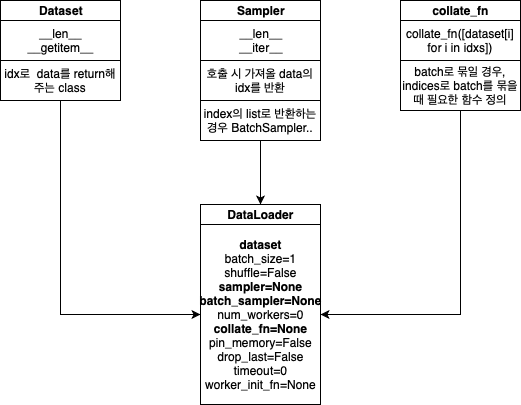

transforms.ToTensor() - 데이터를 tensor로 바꿔준다.

transforms.Normalize(mean, std, inplace=False) - 정규화한다.

transforms.ToPILImage() - csv 파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.

transforms.Compose - 여러 단계로 변환해야 하는 경우, Compose를 통해 여러 단계를 묶을 수 있다.

Dataset 클래스의 __getitem__ 함수내에서 데이터를 변환하여 리턴될 때 주로 사용됩니다.

1. ToTensor
ToTensor는 매우 일반적으로 사용되는 conversion transform입니다. PyTorch에서 우리는 주로 텐서 형태의 데이터로 작업합니다. 입력 데이터가 NumPy 배열 또는 PIL 이미지 형식인 경우 ToTensor를 사용하여 텐서 형식으로 변환할 수 있습니다. transforms.ToTensor()

2. Normalize
Normalize 작업은 텐서를 가져와 평균 및 표준 편차로 정규화합니다. transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) - mean : (sequence)형식으로 평균을 입력하며, 괄호 안에 들어가 있는 수의 개수가 채널의 수이다. - std : (sequence)형식으로 표준을 입력하며, 마찬가지로 괄호 안에 들어가 있는 수의 개수가 채널의 수이다.

3. CenterCrop
이것은 중앙에서 주어진 텐서 이미지를 자릅니다. transform.CenterCrop(height, width) 형식으로 자르려는 크기를 입력으로 제공할 수 있습니다.

4. RandomHorizontalFlip
이 변환은 주어진 확률로 이미지를 무작위로 수평으로 뒤집을(flip) 것입니다. 이 확률은 매개변수 'p'를 통해 설정할 수 있습니다. p의 기본값은 0.5입니다.

5. RandomRotation
이 변환은 이미지를 각도만큼 무작위로 회전합니다. 도(degree) 단위의 각도는 해당 매개변수 "degree"에 대한 입력으로 제공될 수 있습니다.

6. Grayscale
이 변환은 원본 RGB 이미지를 회색조로 변경합니다. " num_output_channels" 매개변수에 입력으로 원하는 채널 수를 제공할 수 있습니다 .

7. 가우시안 블러
여기에서 이미지는 무작위로 선택된 가우시안 흐림 효과로 흐려집니다. kernel_size 인수를 제공하는 것은 필수입니다.

8. RandomApply
이 변환은 확률로 주어진 transformation 들을 무작위로 적용합니다.

9. Compose
transform에 여러 단계가 있는 경우, Compose를 통해 여러 단계를 하나로 묶을 수 있습니다. transforms에 속한 함수들을 Compose를 통해 묶어서 한번에 처리할 수 있습니다.

In [ ]:
class model(nn.Module):
    def __init__(self,path,transform=None):
        super(model,self).__init__()
        self.path=path
        self.imgs=list(sorted(os.listdir(self.path)))
        self.transforms=transforms

    def __len__(self):
        return len(self.images)

    def __getitem__(self,idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        ....
        ....
        if self.transform:
            img = self.transform(img)

        return img, target

torchvision_transform = transforms.Compose([
    transforms.Resize((300, 300)), 
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionMaskDataset(
    path = 'images/',
    transform = torchvision_transform
)        

In [142]:
import pytorch_lightning as pl

In [151]:
#토치 라이크닝
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.core import LightningModule
from torchmetrics import functional as FM
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
train_dataset, val_dataset = random_split(training_data, [55000, 5000])

learning_rate = 1e-3
batch_size = 64
epochs = 10

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

class LitModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            torch.nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            torch.nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 64),
            torch.nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = FM.accuracy(logits, y)
        loss = F.cross_entropy(logits, y)
        metrics = {'val_acc': acc, 'val_loss': loss}
        self.log_dict(metrics)

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        acc = FM.accuracy(logits, y)
        loss = F.cross_entropy(logits, y)
        metrics = {'test_acc': acc, 'test_loss': loss}
        self.log_dict(metrics)    

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=learning_rate)

model = LitModel()
trainer = Trainer(max_epochs=epochs)
trainer.fit(model, train_dataloader, val_dataloader)

trainer.test(test_dataloaders=test_dataloader)

label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))

model.eval()
for i in range(1, columns*rows+1):
    data_idx = torch.randint(len(test_dataloader),(1,)).item()
    input_img = test_data[data_idx][0].unsqueeze(dim=0)

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]

    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred)
        cmap = 'Blues'
    else:
        plt.title(pred + '=>' +  label)
        cmap = 'Reds'
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')

plt.show() 


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: /home/eternal/lightning_logs
2024-01-15 23:13:23.022107: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 23:13:23.039228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting t

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/home/eternal/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


TypeError: accuracy() missing 1 required positional argument: 'task'